In [1]:
import torch
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
from matplotlib import animation

In [2]:
# 参数设置

In [3]:
Tmax = 1000
Tmin = 1
value_range = 10
alpha = 0.98
iter_max = 5000
meanMarkov = 1000
StepFactor = 0.02

In [4]:
# 代价函数

In [5]:
def rastrigin(x,y):
    d = 2
    Z = 10 * d + x ** 2 - 10 * np.cos(2 * np.pi * x) + y ** 2 - 10 * np.cos(2 * np.pi * y)
    return Z

In [6]:
# 随机生成函数

In [7]:
def random_generate():
    random.seed()
    x = (random.random()*2 - 1) * value_range
    y = (random.random()*2 - 1) * value_range
    return x,y

In [8]:
# 产生新解

In [9]:
def generate(now_x,now_y):
    new_x = now_x
    new_y = now_y
    flag = False
    random.seed()
    if random.random() <= 0.5:
        flag = True
    if flag == True:
        new_x = now_x + StepFactor * value_range * (random.random()-0.5)
        if new_x > 10:
            new_x = 10
        elif new_x < -10:
            new_x = -10
    else:
        new_y = now_y + StepFactor * value_range * (random.random()-0.5)
        if new_y > 10:
            new_y = 10
        elif new_y < -10:
            new_y = -10
    return new_x, new_y


In [10]:
# 判断接受函数

In [11]:
def is_accept(origin_y,new_y,T):
    if(new_y < origin_y):
        return True
    else:
        accept_rate = np.exp(-(new_y-origin_y)/T)
        random.seed()
        reference_rate = random.random()
        if accept_rate>=reference_rate:
            return True
        else:
            return False

In [12]:
# cooling schedule

In [13]:
def lower_t(t):
    result = Tmax * (alpha ** t)
    return result

In [14]:
# 终止条件判断

In [15]:
def is_over(T, aff, step):
    if T < Tmin:
        return True
    elif aff == 0:
        return True
    elif step == iter_max:
        return True
    else:
        return False

In [33]:
#主程序
T = Tmax
aff_arr = []
now_aff_arr = []
x_arr = []
y_arr = []
accept_point_arr = []
iter_step = 0
x,y = random_generate()
aff = rastrigin(x,y)
best_x = x
best_y = y
best_aff = aff
now_aff = aff
now_x = x
now_y = y
aff_arr.append(best_aff)
now_aff_arr.append(now_aff)
x_arr.append(x)
y_arr.append(y)
print('--------------初始化------------')
print('x =',x,'y =',y)
print('现在的适应度值为：',now_aff)
print('最佳的适应度值为：',best_aff)
print('现在的温度为：',T)

--------------初始化------------
x = 7.256039770716292 y = 1.4384730287172753
现在的适应度值为： 84.3607354263507
最佳的适应度值为： 84.3607354263507
现在的温度为： 1000


In [34]:
while not is_over(T, now_aff, iter_step):
    accept_point = 0
    for k in range(meanMarkov):
        x,y = generate(now_x,now_y)
        aff = rastrigin(x,y)
        flag = False
        if is_accept(now_aff, aff, T):
            flag = True
            now_aff = aff
            now_x = x
            now_y = y
            accept_point = accept_point + 1
            if now_aff < best_aff:
                best_aff = now_aff
                best_x = now_x
                best_y = now_y
    aff_arr.append(best_aff)
    now_aff_arr.append(now_aff)
    x_arr.append(now_x)
    y_arr.append(now_y)
    accept_point_arr.append(accept_point)
    iter_step = iter_step + 1
    T = lower_t(iter_step)
    print('--------------第'+str(iter_step)+'步------------')
    print('x =',x,'y =',y)
    print('flag =',flag)
    print('现在的适应度值为：',now_aff)
    print('最佳的适应度值为：',best_aff)
    print('现在的温度为：',T)
    print('接受点数为：', accept_point)
print('达到终止条件，运行结束')

--------------第1步------------
x = 5.181692422929299 y = 1.329031799465103
flag = True
现在的适应度值为： 49.21906428357693
最佳的适应度值为： 26.068089569029766
现在的温度为： 980.0
接受点数为： 998
--------------第2步------------
x = 8.483313668040958 y = 1.0242611012896754
flag = True
现在的适应度值为： 93.07677169403684
最佳的适应度值为： 26.068089569029766
现在的温度为： 960.3999999999999
接受点数为： 999
--------------第3步------------
x = 9.633786480909967 y = -1.0426195278949917
flag = True
现在的适应度值为： 110.92342777878211
最佳的适应度值为： 26.068089569029766
现在的温度为： 941.1919999999999
接受点数为： 999
--------------第4步------------
x = 9.367619598903637 y = -2.078381427531843
flag = True
现在的适应度值为： 109.99604144769337
最佳的适应度值为： 26.068089569029766
现在的温度为： 922.3681599999999
接受点数为： 999
--------------第5步------------
x = 8.892704863549296 y = -1.5232795283257197
flag = True
现在的适应度值为： 103.48145123216014
最佳的适应度值为： 26.068089569029766
现在的温度为： 903.9207968
接受点数为： 999
--------------第6步------------
x = 9.208243784811502 y = -0.8112583561188669
flag = True
现在的适应度值为： 99.10162656

--------------第46步------------
x = 4.6498385040583665 y = 3.063434868104489
flag = True
现在的适应度值为： 47.675532529366194
最佳的适应度值为： 2.0210965838495536
现在的温度为： 394.82030698795666
接受点数为： 999
--------------第47步------------
x = 5.1685979782639775 y = 2.1824218592378095
flag = True
现在的适应度值为： 42.46320830122637
最佳的适应度值为： 2.0210965838495536
现在的温度为： 386.92390084819755
接受点数为： 997
--------------第48步------------
x = 6.364710762573917 y = 1.4530251655393067
flag = True
现在的适应度值为： 78.78788153363541
最佳的适应度值为： 2.0210965838495536
现在的温度为： 379.18542283123355
接受点数为： 998
--------------第49步------------
x = 6.091262006974073 y = -0.7493477640197251
flag = True
现在的适应度值为： 49.30544970351262
最佳的适应度值为： 2.0210965838495536
现在的温度为： 371.60171437460895
接受点数为： 997
--------------第50步------------
x = 4.3161567310142965 y = -2.4198348079276126
flag = True
现在的适应度值为： 57.28094665054679
最佳的适应度值为： 2.0210965838495536
现在的温度为： 364.1696800871168
接受点数为： 996
--------------第51步------------
x = 3.6549693266996126 y = -7.043416249470419
flag

--------------第93步------------
x = -1.2625740188922525 y = -3.2526036310153454
flag = True
现在的适应度值为： 33.1263344782105
最佳的适应度值为： 2.0210965838495536
现在的温度为： 152.7654133138631
接受点数为： 993
--------------第94步------------
x = -0.600382815845607 y = -3.6132704908733233
flag = True
现在的适应度值为： 49.06472170767493
最佳的适应度值为： 2.0210965838495536
现在的温度为： 149.7101050475858
接受点数为： 993
--------------第95步------------
x = 2.6572445108916614 y = -3.5079845334050073
flag = True
现在的适应度值为： 54.85796041720562
最佳的适应度值为： 2.0210965838495536
现在的温度为： 146.7159029466341
接受点数为： 994
--------------第96步------------
x = 3.1067553932560585 y = -4.185260944298289
flag = True
现在的适应度值为： 35.37844127453785
最佳的适应度值为： 2.0210965838495536
现在的温度为： 143.7815848877014
接受点数为： 993
--------------第97步------------
x = 2.368145406810406 y = -4.8843948137041515
flag = True
现在的适应度值为： 48.74957851818146
最佳的适应度值为： 2.0210965838495536
现在的温度为： 140.90595318994738
接受点数为： 995
--------------第98步------------
x = 4.0779212456671985 y = -5.758613785872811
flag

--------------第144步------------
x = 1.2160938066629114 y = -2.8440211034537337
flag = True
现在的适应度值为： 21.883172055495073
最佳的适应度值为： 2.0210965838495536
现在的温度为： 54.51988106098796
接受点数为： 986
--------------第145步------------
x = 2.96405504749225 y = -2.4757845034874846
flag = True
现在的适应度值为： 35.05356171810412
最佳的适应度值为： 2.0210965838495536
现在的温度为： 53.429483439768205
接受点数为： 980
--------------第146步------------
x = 4.466822901077388 y = -2.7923850238706454
flag = True
现在的适应度值为： 54.90167151841432
最佳的适应度值为： 2.0210965838495536
现在的温度为： 52.36089377097284
接受点数为： 983
--------------第147步------------
x = 2.3966663266454855 y = -2.7453235552035955
flag = True
现在的适应度值为： 41.53988458159519
最佳的适应度值为： 2.0210965838495536
现在的温度为： 51.31367589555339
接受点数为： 985
--------------第148步------------
x = 3.801469839677617 y = -2.9419978685614643
flag = True
现在的适应度值为： 30.585413107653213
最佳的适应度值为： 2.0210965838495536
现在的温度为： 50.287402377642316
接受点数为： 981
--------------第149步------------
x = 5.351490995008761 y = -1.80749513873624

--------------第191步------------
x = 6.991274231268628 y = 3.1667131890156983
flag = True
现在的适应度值为： 63.92354495789152
最佳的适应度值为： 2.0210965838495536
现在的温度为： 21.09504505389723
接受点数为： 967
--------------第192步------------
x = 6.347898833430502 y = 3.2008092418163034
flag = True
现在的适应度值为： 73.26976359103921
最佳的适应度值为： 2.0210965838495536
现在的温度为： 20.673144152819287
接受点数为： 943
--------------第193步------------
x = 4.474076076811546 y = 1.8329695908325172
flag = True
现在的适应度值为： 48.26457570873373
最佳的适应度值为： 2.0210965838495536
现在的温度为： 20.2596812697629
接受点数为： 951
--------------第194步------------
x = 4.872863267107678 y = 1.9669554183796014
flag = True
现在的适应度值为： 30.852977155404517
最佳的适应度值为： 2.0210965838495536
现在的温度为： 19.854487644367644
接受点数为： 946
--------------第195步------------
x = 3.945823541427504 y = 3.2119835593807498
flag = False
现在的适应度值为： 29.17110286539056
最佳的适应度值为： 2.0210965838495536
现在的温度为： 19.45739789148029
接受点数为： 951
--------------第196步------------
x = 3.295032965977332 y = 4.215950001466742
flag =

--------------第241步------------
x = 1.078495483228941 y = -6.056113925023153
flag = True
现在的适应度值为： 39.6465836878797
最佳的适应度值为： 0.08558376550278624
现在的温度为： 7.682175808701069
接受点数为： 883
--------------第242步------------
x = 0.8914963090464194 y = -6.246272479402577
flag = False
现在的适应度值为： 47.3647763177683
最佳的适应度值为： 0.08558376550278624
现在的温度为： 7.528532292527048
接受点数为： 890
--------------第243步------------
x = 0.9059831034877702 y = -5.995577626837723
flag = True
现在的适应度值为： 38.46624894361904
最佳的适应度值为： 0.08558376550278624
现在的温度为： 7.377961646676506
接受点数为： 892
--------------第244步------------
x = -0.028830052565606626 y = -5.688823735719879
flag = True
现在的适应度值为： 46.277026517141586
最佳的适应度值为： 0.08558376550278624
现在的温度为： 7.230402413742976
接受点数为： 888
--------------第245步------------
x = -0.30154262864258863 y = -5.943844293422386
flag = True
现在的适应度值为： 49.21845626824391
最佳的适应度值为： 0.08558376550278624
现在的温度为： 7.085794365468116
接受点数为： 847
--------------第246步------------
x = 0.0859272976261433 y = -5.099978720

--------------第290步------------
x = -0.10668703721756856 y = 0.1418972395915209
flag = True
现在的适应度值为： 5.913438915753848
最佳的适应度值为： 0.0002418489902993315
现在的温度为： 2.854709700640465
接受点数为： 782
--------------第291步------------
x = -0.10774595816146762 y = 0.15083132520922096
flag = True
现在的适应度值为： 6.404212449674241
最佳的适应度值为： 0.0002418489902993315
现在的温度为： 2.7976155066276553
接受点数为： 811
--------------第292步------------
x = -1.0570050882058122 y = -0.012167700352408495
flag = True
现在的适应度值为： 1.7812312586725145
最佳的适应度值为： 0.0002418489902993315
现在的温度为： 2.7416631964951024
接受点数为： 772
--------------第293步------------
x = -0.8281950639905683 y = 0.9622528533617555
flag = False
现在的适应度值为： 3.2733889089518815
最佳的适应度值为： 0.0002418489902993315
现在的温度为： 2.6868299325652005
接受点数为： 787
--------------第294步------------
x = -1.1192535782442328 y = 1.0135894991770273
flag = False
现在的适应度值为： 2.7378491165703807
最佳的适应度值为： 0.0002418489902993315
现在的温度为： 2.6330933339138967
接受点数为： 778
--------------第295步------------
x = -1.056625

--------------第338步------------
x = -0.9878290838735537 y = 0.9965860101360774
flag = True
现在的适应度值为： 2.000516235585023
最佳的适应度值为： 0.0002418489902993315
现在的温度为： 1.082464304897779
接受点数为： 660
--------------第339步------------
x = -0.9915173104494472 y = 0.9613905364085139
flag = True
现在的适应度值为： 2.214388844940025
最佳的适应度值为： 0.0002418489902993315
现在的温度为： 1.0608150187998233
接受点数为： 652
--------------第340步------------
x = -1.0038413091865415 y = 0.9661827032775365
flag = True
现在的适应度值为： 2.169010348925122
最佳的适应度值为： 0.0002418489902993315
现在的温度为： 1.039598718423827
接受点数为： 664
--------------第341步------------
x = -1.081791216460342 y = 0.9972656351036777
flag = False
现在的适应度值为： 2.0067060260383798
最佳的适应度值为： 0.0002418489902993315
现在的温度为： 1.0188067440553505
接受点数为： 651
--------------第342步------------
x = -1.0689728572731574 y = 0.9386403172262074
flag = True
现在的适应度值为： 3.6822115231827564
最佳的适应度值为： 0.0002418489902993315
现在的温度为： 0.9984306091742434
接受点数为： 634
达到终止条件，运行结束


<IPython.core.display.Javascript object>


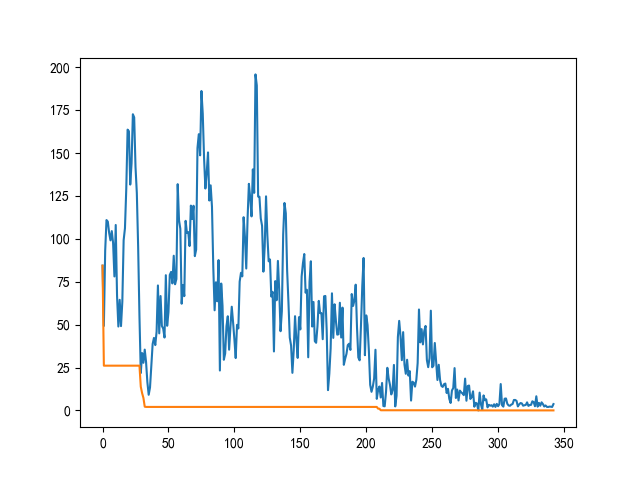

In [35]:
%matplotlib notebook 
plt.plot(now_aff_arr)
plt.plot(aff_arr)
plt.show()

<IPython.core.display.Javascript object>


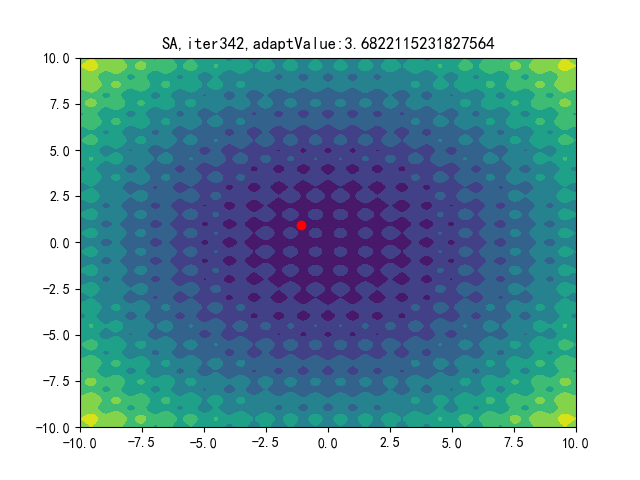

In [38]:
%matplotlib notebook 
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
fig, ax = plt.subplots()
xdata = x_arr
ydata = y_arr
n = 500
x = np.linspace(-10, 10, n)
y = np.linspace(-10, 10, n)
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, rastrigin(X,Y))
point, = plt.plot(xdata[0], ydata[0], 'ro')

def init():
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    return point

def update(frame):  # 帧
    point.set_data(xdata[frame], ydata[frame])
    i = frame
    a = rastrigin(xdata[frame], ydata[frame])
    ax.set_title('SA,iter'+str(i)+',adaptValue:'+str(a),loc = 'center')
    return point

ani = animation.FuncAnimation(
    fig=fig,
    func=update,
    frames=range(len(x_arr)),
    init_func=init,
    interval=50,  # 时间间隔: 毫秒
    repeat=False)


plt.show()
ani.save('SA.gif',writer='pillow')

<IPython.core.display.Javascript object>


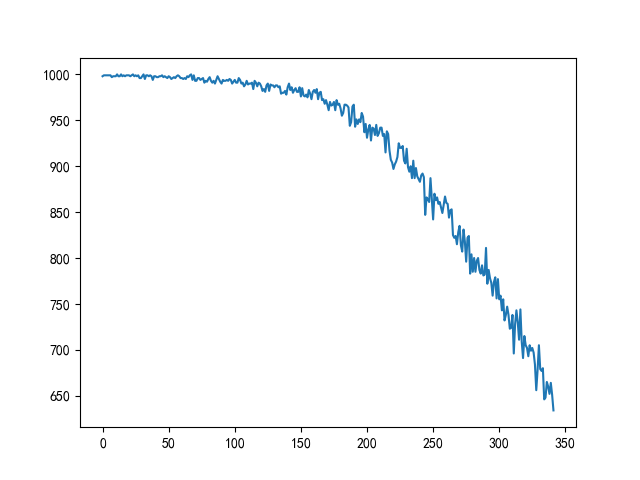

In [39]:
%matplotlib notebook 
plt.plot(accept_point_arr)
plt.show()